<a href="https://colab.research.google.com/github/aivrm/ai/blob/main/EX_5_7_%EA%B0%80%EC%9C%84%EB%B0%94%EC%9C%84%EB%B3%B4_%EB%B6%84%EB%A5%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
## 5-7. 미니 프로젝트 : 가위바위보 분류기를 만들자

---

In [78]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.8.2
1.21.6


---
아래의 사이트에서,  가위,바위,보 이미지를 각각 100개씩 캡쳐하여 zip화일로 받는다. (224x224 픽셀의 이미지임)

Teachable Machine

https://teachablemachine.withgoogle.com/

---


---
가위 는 scissor.zip

바위 는 rock.zip

보 는 paper.zip 로 이름을 바꾸고,

각각의 zip화일에는 이미지 100개씩 들어있도록 한다.  (224x224 픽셀의 이미지들임)

---

---
~/aiffel/aiffel/rock_scissor_paper 디렉토리에,

scissor, rock, paper 디렉토리를 만든다.

해당 디렉토리에 맞는 zip화일을 넣고,

unzip으로 압축을 푼다.

---

In [79]:
from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


---
위에서 획득한 이미지는 224x224 픽셀인데,

28x28 픽셀의 이미지로 리사이즈 한다.

---

In [80]:
# 28x28 픽셀로 리사이즈
def resize_images(img_path):
    images = glob.glob(img_path + "/*.jpg")

    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size = (28, 28)

    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "JPEG")

    print(len(images), " images resized.")

In [81]:
from os.path import join
DIR_img = '/content/drive/MyDrive/_aiffel/aiffel/rock_scissor_paper'

In [82]:
# 가위 이미지가 저장된 scissor 디렉토리 아래의 모든 jpg 파일을 28x28 픽셀로
#image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
image_dir_path = join(DIR_img, 'scissor')
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


In [83]:
# 바위 이미지가 저장된 rock 디렉토리 아래의 모든 jpg 파일을 28x28 픽셀로
#image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
image_dir_path = join(DIR_img, 'rock')
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
바위 이미지 resize 완료!


In [84]:
# 보 이미지가 저장된 paper 디렉토리 아래의 모든 jpg 파일을 28x28 픽셀로
#image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
image_dir_path = join(DIR_img, 'paper')
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
보 이미지 resize 완료!


---
scissor, rock, paper 디렉토리의 jpg 이미지들을, 편리하게 읽어들이는 함수

---

In [85]:
# scissor, rock, paper 디렉토리의 jpg 이미지들을, 편리하게 읽어들이는 함수
def load_data(img_path, number_of_data=300):    # 가위바위보 이미지 갯수 총합 300장

    # 가위:0 | 바위:1 | 보:2
    img_size = 28
    color = 3

    # 이미지 데이터와 라벨(가위:0 | 바위:1 | 보:2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs = np.zeros(number_of_data * img_size * img_size * color, dtype = np.int32).reshape(number_of_data, img_size, img_size, color)
    labels = np.zeros(number_of_data, dtype = np.int32)

    idx = 0
    for file in glob.iglob(img_path + '/scissor/*.jpg'):
        img = np.array(Image.open(file), dtype = np.int32)
        imgs[idx, :, :, :] = img    # 데이터 영역에 이미지 행력을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

---
정규화

---

In [86]:
print(DIR_img)

/content/drive/MyDrive/_aiffel/aiffel/rock_scissor_paper


In [87]:
#image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"

(x_train, y_train) = load_data(DIR_img)

# 정규화
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


---
샘플로 하나 확인

---

라벨:  0


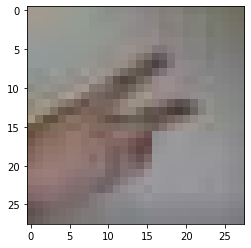

In [88]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
print('라벨: ', y_train[0])

---
딥러닝 네트웍 설계

---

In [89]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
# [[YOUR CODE]]

# hyperpameters
n_channel_1 = 16
n_channel_2 = 32
n_dense = 64

n_train_epoch = 10

# tensorflow.keras 의 Sequential API
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3))) # 입력 이미지의 형태
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))    # 입력 이미지가 다양할수록 더 많은 특징을 보자.
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))    # 분류기 알고리즘을 얼마나 복잡하게 할 것인가? (복잡한 문제일수록 이 수를 증가시킬 것)
model.add(keras.layers.Dense(3, activation='softmax')) # 분류기의 최종 class 수 (여기서는 3개)

print('Model에 추가된 Layer 개수: ', len(model.layers))

# 모델 개요
model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 16)        448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 800)               0         
                                                                 
 dense_4 (Dense)             (

---
딥러닝 네트웍 학습

---

In [90]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.
# [[YOUR CODE]]

# Reshape
print("Before Reshape - x_train_norm shape : {}".format(x_train_norm.shape))
#print("Before Reshape - x_test_norm shape  : {}".format(x_test_norm.shape))

x_train_reshaped = x_train_norm.reshape( -1, 28, 28, 3) # 데이터 갯수에 -1을 쓰면, reshape시 자동계산됩니다.
#x_test_reshaped  = x_test_norm.reshape ( -1, 28, 28, 3)

print("After Reshape - x_train_reshaped shape : {}".format(x_train_reshaped.shape))
#print("After Reshape - x_test_reshaped shape  : {}".format(x_test_reshaped.shape))

# 학습
model.compile(optimizer='adam', # 아담
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

Before Reshape - x_train_norm shape : (300, 28, 28, 3)
After Reshape - x_train_reshaped shape : (300, 28, 28, 3)
Epoch 1/10
10/10 [==============================] - 0s 4ms/step - loss: 1.1262 - accuracy: 0.3000
Epoch 2/10
10/10 [==============================] - 0s 4ms/step - loss: 1.0669 - accuracy: 0.3700
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 1.0005 - accuracy: 0.8100
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 0.9095 - accuracy: 0.9900
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 0.7524 - accuracy: 0.9800
Epoch 6/10
10/10 [==============================] - 0s 5ms/step - loss: 0.5391 - accuracy: 0.9700
Epoch 7/10
10/10 [==============================] - 0s 4ms/step - loss: 0.3261 - accuracy: 0.9600
Epoch 8/10
10/10 [==============================] - 0s 5ms/step - loss: 0.2023 - accuracy: 0.9767
Epoch 9/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1278 - accuracy: 0.9933
Epoch

---
테스트

---

테스트용 이미지 300개를 ~/aiffel/aiffel/rock_scissor_paper/test 폴더에 넣는다.

가위, 바위, 보 순서로 각각 100개씩 넣음.

---
테스트용 데이터 28x28로 리사이즈

In [91]:
# test 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서 resize
#image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
image_dir_path = join(DIR_img, 'test')
resize_images(image_dir_path)
print("test 이미지 resize 완료!")

300  images to be resized.
300  images resized.
test 이미지 resize 완료!


---
테스트용 데이터 로딩

In [92]:
# 테스트 데이터용 load 함수
def load_test_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/test/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사

        if(idx <= 100):
            labels[idx]=0   # 가위 : 0
        if(idx > 100 and idx <= 200):
            labels[idx]=1   # 바위 : 1
        if(idx > 200 and idx <= 300):
            labels[idx]=2   # 보 : 2

        idx=idx+1
        
    print("테스트 데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

In [93]:
# 테스트용 데이터 load
#image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_test, y_test) = load_test_data(DIR_img)

테스트 데이터(x_test)의 이미지 개수는 300 입니다.


In [94]:
# 테스트용 데이터 정규화
x_test_norm = x_test / 255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [95]:
# 테스트용 데이터 Reshape
print("Before Reshape - x_test_norm shape  : {}".format(x_test_norm.shape))

x_test_reshaped  = x_test_norm.reshape ( -1, 28, 28, 3)

print("After Reshape - x_test_reshaped shape  : {}".format(x_test_reshaped.shape))

Before Reshape - x_test_norm shape  : (300, 28, 28, 3)
After Reshape - x_test_reshaped shape  : (300, 28, 28, 3)


In [96]:
# model.evaluate
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss    : {}".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 5.7200 - accuracy: 0.3333 - 125ms/epoch - 12ms/step
test_loss    : 5.719996929168701
test_accuracy: 0.3333333432674408


---
# 회고

---

이번 노드에서는,

accuracy 라는 것이, 훈련용 데이터를 대상으로, 맞고 틀린 것만을 따지기 때문에,

Hyperparameters를 조정하여, accuracy를 아무리 100%에 근접하도록 만들어도,

테스트 데이터에서는 무용지물이 될 수 있다는 사실을 확실히 배웠습니다.

또한, 훈련량을 늘리면 훈련용 데이터에서 accuracy는 소폭이라도 증가하는 반면,

그렇다고 하여, 테스트 데이터에서도 accuracy가 증가하는 것이 아니라,

오히려 감소할 수도 있음을 확인할 수 있었습니다.